# Overview

The intent of this project was to deepen personal understanding and  experiences using open-source software for CNNs, specifically for identification of animals/wildlife.

R-CNN pretrained model are referenced in multiple wildlife research projects, typically in conjuction with the COCO dataset for images. The PytorchWildlife library was published in 2024, and at this time has a singular reference in reviewed literature.

**Faster R-CNN Articles**


*   https://www.mdpi.com/1099-4300/24/3/353
*   https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/2041-210X.13436
* https://library.imaging.org/ei/articles/32/8/art00003




**PytorchWildlife Article**


*   https://arxiv.org/html/2405.12930v2


**Methods**
The CNNs were both used to detect wildlife objects. Ten total pictures were used, all from the same cameratrap. Six images were used with animals, and four images contained no animals. Three edgecases were included. One image had two animals (deer). One image had one animal that was not initially noticeable to the human viewer (rabbit). One of the non-animal images contained a barrel.

Images were run through each model, and note was made of number of detections and confidence of the highest detection. Each image which originally had a bounding box placed over the image was cropped to show just the animal. Note of sized of the cropped images were made for each picture. A 15 pixel padding was added to each side of the bounding box dimensions prior to cropping.



# Faster R-CNN with COCO Dataset

Framework for code used from AarohiSingla Lecture 6 on Pytorch for Deep Learning.

*   https://github.com/AarohiSingla/pytorch-for-deep-learning/blob/main/


Lecture_6/Object_detection_pretrained.ipynb

Modifications made include making the process modular and cropping of images instead of only bounding boxes.

In [5]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

object_detection_model = fasterrcnn_resnet50_fpn(pretrained=True)

object_detection_model.eval(); ## Setting Model for Evaluation/Prediction

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

In [7]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '','__background__','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [8]:
CONFIDENCE_THRESHOLD = 0.75
PADDING = 15
global count
count = 1

In [9]:

def predict(path, input_img):
  # Load the image
  test_img = Image.open(path + "/" +input_img)

  # Define the transformation - convert image to tensor
  transform = transforms.Compose([
      transforms.ToTensor(),
  ])

  # Apply the transformation to the image
  test_img_tensor = transform(test_img)

  #  We added this dimension because models work on batches of images.
  test_img_tensor = test_img_tensor.unsqueeze(dim=0)

  preds = object_detection_model(test_img_tensor)


    # Convert tensor image back to numpy for visualization
  img = test_img_tensor.squeeze().detach().cpu().numpy()  # Adjust dimensions as necessary
  img = img.transpose(1, 2, 0)  # Rearrange the dimensions from CxHxW to HxWxC for image display


  # Add bounding boxes and labels
  global count
  check = count
  for box, label, score in zip(preds[0]['boxes'], preds[0]['labels'], preds[0]['scores']):
      print(str(input_img) + " " + str(score.item()))
      if score.item() > CONFIDENCE_THRESHOLD:
        x1, y1, x2, y2 = box.detach().cpu().numpy()  # Make sure to detach and convert boxes as well

        label_index = label.item()
        label_name = COCO_INSTANCE_CATEGORY_NAMES[label_index]
        crop = test_img.crop((x1 - PADDING, y1 - PADDING, x2 + PADDING, y2 + PADDING))
        crop.save(f'/content/COCO/{count}{input_img}')
        count += 1
"""  if check < count:
    return True
  else:
    print(str(score.item()) + " for " + str(input_img))
    return False"""


'  if check < count:\n    return True\n  else:\n    print(str(score.item()) + " for " + str(input_img))\n    return False'

In [11]:
path = '/content/Images'

imageList = os.listdir(path)

for im in imageList:
  predict(path, im)

Test4.JPG 0.9998356103897095
Test4.JPG 0.11353407055139542
Test4.JPG 0.05110327526926994
Test2.JPG 0.5805283784866333
Test2.JPG 0.39678099751472473
Test2.JPG 0.3940868377685547
Test2.JPG 0.36227867007255554
Test2.JPG 0.18475548923015594
Test2.JPG 0.15325042605400085
Test1.JPG 0.7772976160049438
Test1.JPG 0.38579732179641724
Test1.JPG 0.31881463527679443
Test1.JPG 0.3032735288143158
Test1.JPG 0.21026992797851562
Test1.JPG 0.20933960378170013
Test1.JPG 0.05504922941327095
Test1.JPG 0.05423755571246147
Test1.JPG 0.052307114005088806
Test1.JPG 0.050258975476026535
Test9.JPG 0.9208542108535767
Test9.JPG 0.38979533314704895
Test9.JPG 0.23030540347099304
Test9.JPG 0.14632591605186462
Test9.JPG 0.11261674761772156
Test9.JPG 0.07598309218883514
Test9.JPG 0.0560951754450798
Test5.JPG 0.7683063745498657
Test5.JPG 0.6897185444831848
Test5.JPG 0.3394249975681305
Test5.JPG 0.28510499000549316
Test5.JPG 0.2764013111591339
Test5.JPG 0.17390644550323486
Test5.JPG 0.08360284566879272
Test5.JPG 0.0739101

In [ ]:
c = Image.open('/content/Images/FoundAfieldLLC-35.jpg')
c



---



---



# PytorchWildlife

Code implemented using library documentation demonstration.


*   https://github.com/microsoft/CameraTraps/blob/main/demo/image_detection_demo.ipynb

Modification include change in use of batch files. The library modules for batch documents produced errors related to expected and returned datatypes, and therefore I unpacked the returned data for usage. Furthermore the crop of the image was utilized as with the other CNN.



In [ ]:
pip install PytorchWildlife

In [1]:
import numpy as np
from PIL import Image
import torch
from torch.utils.data import DataLoader
from PytorchWildlife.models import detection as pw_detection
from PytorchWildlife.data import transforms as pw_trans
from PytorchWildlife.data import datasets as pw_data
from PytorchWildlife import utils as pw_utils
import os

In [2]:
PADDING = 15

In [3]:
def predict(input_img):
  DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
  detection_model = pw_detection.MegaDetectorV5(device=DEVICE, pretrained=True)
  tgt_img_path = os.path.join("/content","Images", input_img)
  tgt_img = Image.open(tgt_img_path).convert("RGB")
  img = np.array(tgt_img)
  transform = pw_trans.MegaDetector_v5_Transform(target_size=detection_model.IMAGE_SIZE,
                                                stride=detection_model.STRIDE)
  results = detection_model.single_image_detection(transform(img), img.shape, tgt_img_path)
  #pw_utils.save_detection_images(results, os.path.join(".","demo_output"), overwrite=False)
  print(results)
  return results

def crop(input_img, results):
  x1, y1, x2, y2 = results
  tgt_img_path = os.path.join("/content","Images", input_img)
  tgt_img = Image.open(tgt_img_path).convert("RGB")
  crop = tgt_img.crop((x1 - PADDING, y1 - PADDING, x2 + PADDING, y2 + PADDING))
  crop.save(f'/content/PyWild/{input_img}')

In [4]:
path = '/content/Images'

imageList = os.listdir(path)
print(imageList)

for im in imageList:
  if im[0] == '.':
    continue
  else:
    pred = predict(im)
    for i in range(len(pred['detections'].confidence)):
      if pred['detections'].confidence[i] >= 0.75:
        crop(im, pred['detections'].xyxy[i])


['Test6.JPG', 'Test4.JPG', 'Test2.JPG', 'Test7.JPG', 'Test10.JPG', 'Test1.JPG', 'Test3.JPG', 'Test9.JPG', 'Test5.JPG', 'Test8.JPG']


Downloading: "https://zenodo.org/records/10023414/files/MegaDetector_v5b.0.0.pt?download=1" to /root/.cache/torch/hub/checkpoints/MegaDetector_v5b.0.0.pt
100%|██████████| 268M/268M [00:10<00:00, 26.3MB/s]
INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test6.JPG', 'detections': Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None), 'labels': []}


INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test4.JPG', 'detections': Detections(xyxy=array([[        370,         188,         576,         336]], dtype=float32), mask=None, confidence=array([    0.96481], dtype=float32), class_id=array([0]), tracker_id=None), 'labels': ['animal 0.96']}


INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test2.JPG', 'detections': Detections(xyxy=array([[       1693,         678,        3569,        2768],
       [       5013,        1271,        6397,        2255]], dtype=float32), mask=None, confidence=array([    0.94515,     0.90529], dtype=float32), class_id=array([0, 0]), tracker_id=None), 'labels': ['animal 0.95', 'animal 0.91']}


INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test7.JPG', 'detections': Detections(xyxy=array([[         75,         196,         110,         221]], dtype=float32), mask=None, confidence=array([     0.4728], dtype=float32), class_id=array([0]), tracker_id=None), 'labels': ['animal 0.47']}


INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test10.JPG', 'detections': Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None), 'labels': []}


INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test1.JPG', 'detections': Detections(xyxy=array([[          0,          15,         302,         295]], dtype=float32), mask=None, confidence=array([    0.97251], dtype=float32), class_id=array([0]), tracker_id=None), 'labels': ['animal 0.97']}


INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test3.JPG', 'detections': Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None), 'labels': []}


INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test9.JPG', 'detections': Detections(xyxy=array([[        367,         139,         525,         285]], dtype=float32), mask=None, confidence=array([    0.85721], dtype=float32), class_id=array([0]), tracker_id=None), 'labels': ['animal 0.86']}


INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test5.JPG', 'detections': Detections(xyxy=array([[         89,         186,         250,         305]], dtype=float32), mask=None, confidence=array([    0.94048], dtype=float32), class_id=array([0]), tracker_id=None), 'labels': ['animal 0.94']}


INFO:yolov5:Fusing layers... 
Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


{'img_id': '/content/Images/Test8.JPG', 'detections': Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None), 'labels': []}


# Results

##Quantitative Results
Full tabular results can be viewed below this section. The most noteworthy findings are as follows:

* PytorchWildlife identified all wildlife with one exception.
*  The COCO trained RCNN did not identify deer.
*  Neither model identified the edge case of a rabbit that is hard to see. No human data on identification of this picture is available, but the image was intentionally selected as it is not an obvious animal on first viewing.
* PytorchWildlife runtime was 3 minutes 30 seconds.
* COCO trained RCNN runtime was 1 minute 44 seconds.
* Both models avoided detection on the images with no wildlife. On Test8, the COCO model had some detection of the barrel in the picture.

The PytorchWildlife model outperforms the COCO trained RCNN model in wildlife detection over this small dataset. Although the COCO model only detected one less animal, increasing the confidence threshold 3% to 5% would see two additional detections removed. The COCO model did not have any detection of the rabbit edgecase, whereas the PytorchWildlife model had a detection with confidence of 47%. As implemented through this study, the PytorchWildlife module shows promise to be more useful in wildlife detection in comparison to the COCO model.

In regards to cropping images, the regions of detection were generally the same, resulting in similar crops. The PytorchWildlife crops better preserved features near the edge, such as the tail of the coyote.


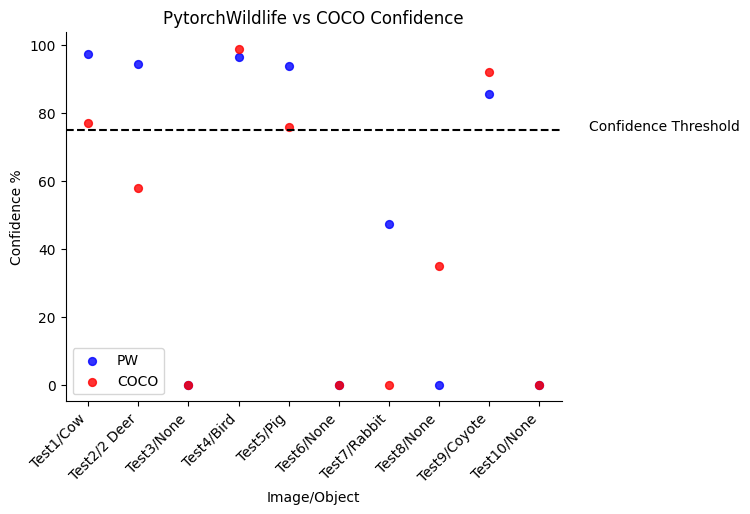




In [4]:
df = pd.read_csv('/content/Results.csv')
df

,Image/Object,PW Detections,COCO Detections,PW Confidence,COCO Confidence,PW Image Dimensions,COCO Image Dimensions
0,Test1/Cow,1,10,97.3,77,332 x 310,282 x 283
1,Test2/2 Deer,2,6,94.5,58,1414 x 1014,NaN
2,Test3/None,0,0,0.0,0,NaN,NaN
3,Test4/Bird,1,3,96.4,99,236 x 178,246 x 178
4,Test5/Pig,1,8,94.0,76,191 x 149,189 x 141
5,Test6/None,0,0,0.0,0,NaN,NaN
6,Test7/Rabbit,1,0,47.2,0,NaN,NaN
7,Test8/None,0,1,0.0,35,NaN,NaN
8,Test9/Coyote,1,7,85.7,92,186 x 176,128 x 143
9,Test10/None,0,0,0.0,0,NaN,NaN


##Personal View
The PytorchWildlife modules were well documented, making them quick and easy to implement. The error from using the batch methods as described was initially frustrating, but generally easy to diagnose and fix.

PytorchWildlife's generic "animal" label also seemed more efficient than labels from the COCO dataset. If the actual object detected is not in the COCO labels, this can lead to misidentification of the object, and result in a lower confidence score. For example, the antlers of the deer image showed minimal confidence and were labeled 'bicycle'.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



---



---



Text(10, 75, 'Confidence Threshold')

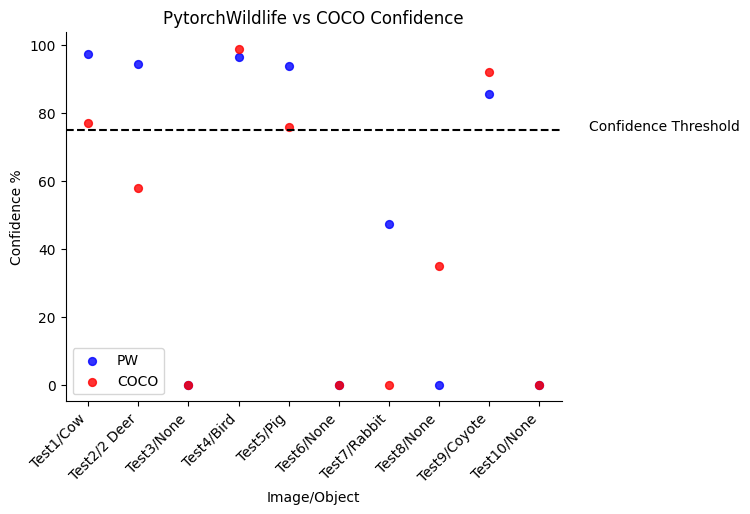

In [26]:
# @title PW Confidence vs COCO Confidence

from matplotlib import pyplot as plt
ax1 = df.plot(kind='scatter', x='Image/Object', y='PW Confidence', s=32, alpha=.8, color = 'blue')
ax2 = df.plot(kind='scatter', x='Image/Object', y='COCO Confidence', s=32, alpha=.8, ax= ax1, color = 'red')
ax1.legend(['PW', 'COCO'])
ax1.set_xlabel('Image/Object')
ax1.set_ylabel('Confidence %')
ax1.set_title('PytorchWildlife vs COCO Confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.axhline(y = 75, color = 'black', linestyle = '--' )
plt.xticks(rotation=45, ha='right')
plt.text(10, 75, 'Confidence Threshold')